In [ ]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
from testCases import *
from dnn_utils import sigmoid, sigmoid_backward, relu, relu_backward
from public_tests import *

%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

np.random.seed(1)

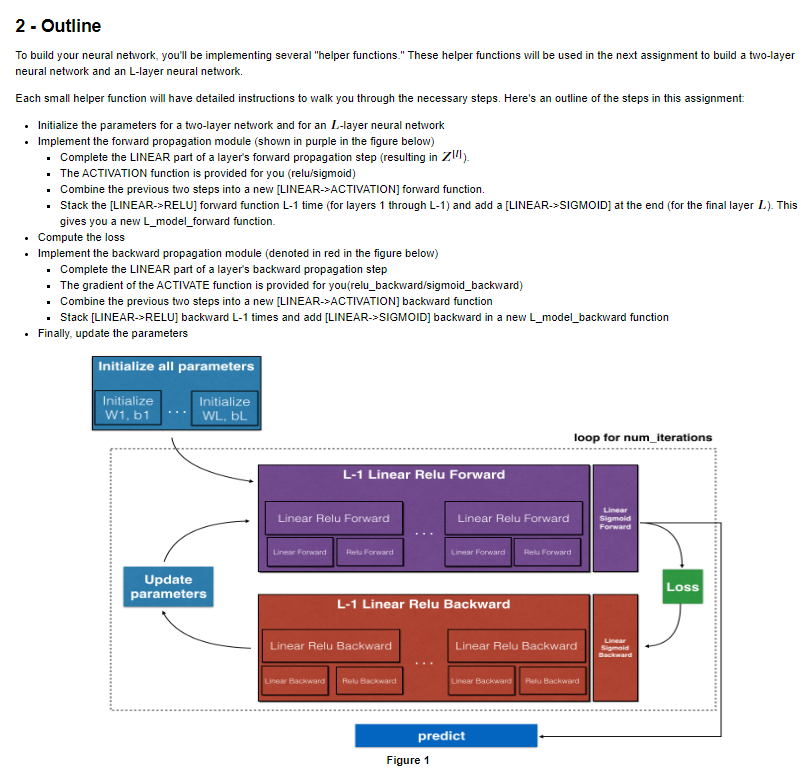

In [ ]:
# Code for randomly initializing the parameters of decision boundary function of layers
def initialize_parameters_deep(layer_dims):
   
    np.random.seed(3)
    parameters = {}
    L = len(layer_dims) # number of layers in the network

    for l in range(1, L):

        parameters["W"+str(l)]=np.random.randn(layer_dims[l],layer_dims[l-1])*0.01
        parameters["b"+str(l)]=np.zeros((layer_dims[l],1))

        assert(parameters['W' + str(l)].shape == (layer_dims[l], layer_dims[l - 1]))
        assert(parameters['b' + str(l)].shape == (layer_dims[l], 1))

        
    return parameters  

In [ ]:
# Code for defining linear decision boundary function
def linear_forward(A, W, b):
    
    Z=np.dot(W,A)+b

    cache = (A, W, b)# to store parameters
    
    return Z, cache

In [ ]:
# Code for defining the logstic function: Int he NN "RELU" function is used for hidden layers and 
# "sigmoid" function is used for last layer
def linear_activation_forward(A_prev, W, b, activation):

    if activation == "sigmoid":
    
        Z, linear_cache =linear_forward(A_prev, W, b)
        A, activation_cache = sigmoid(Z)

    elif activation == "relu":

        Z, linear_cache =linear_forward(A_prev, W, b)
        A, activation_cache = relu(Z)

    cache = (linear_cache, activation_cache)

    return A, cache

In [ ]:
# Code for forward propagation in Neural Network
def L_model_forward(X, parameters):

    caches = []
    A = X
    L = len(parameters) // 2     # number of layers in the neural network

    for l in range(1, L):
        A_prev = A 

        A, cache = linear_activation_forward(A_prev, parameters["W"+str(l)], parameters["b"+str(l)],"relu")
        caches.append(cache)

    AL, cache = linear_activation_forward(A, parameters['W' + str(L)], parameters['b' + str(L)],"sigmoid")
    caches.append(cache)

    return AL, caches

In [ ]:
# Code for computing the cost
def compute_cost(AL, Y):

    m = Y.shape[1]

    cost=-np.sum(Y*np.log(AL)+(1-Y)*np.log(1-AL),axis=1)/m

    cost = np.squeeze(cost)      # To make sure your cost's shape is what we expect (e.g. this turns [[17]] into 17).

    return cost

In [ ]:
# Code for calculationg the derivatives with backward propagation
def linear_backward(dZ, cache):
    A_prev, W, b = cache
    m = A_prev.shape[1]
    dW=np.dot(dZ,A_prev.T)/m
    db=np.sum(dZ,axis=1,keepdims=True)/m
    dA_prev=np.dot(W.T,dZ)

    return dA_prev, dW, db

In [ ]:
def linear_activation_backward(dA, cache, activation):

    linear_cache, activation_cache = cache
    
    if activation == "relu":

        dZ = relu_backward(dA, activation_cache)
        dA_prev, dW, db=linear_backward(dZ, linear_cache)
 
    elif activation == "sigmoid":

        dZ = sigmoid_backward(dA, activation_cache)
        dA_prev, dW, db=linear_backward(dZ, linear_cache)

    return dA_prev, dW, db

In [ ]:
# Code for calculating gradients using backward propagation
def L_model_backward(AL, Y, caches):
    
    grads = {}
    L = len(caches) # the number of layers
    m = AL.shape[1]
    Y = Y.reshape(AL.shape) 
  
    dAL = - (np.divide(Y, AL) - np.divide(1 - Y, 1 - AL))

    current_cache = caches[L-1]
    dA_prev_temp, dW_temp, db_temp = linear_activation_backward(dAL, current_cache, "sigmoid")
    grads["dA" + str(L-1)] = dA_prev_temp
    grads["dW" + str(L)] = dW_temp
    grads["db" + str(L)] = db_temp
  
    for l in reversed(range(L-1)):
       
        current_cache = caches[l]
        dA_prev_temp, dW_temp, db_temp = linear_activation_backward(grads["dA" + str(l + 1)], current_cache, "relu"))
        grads["dA" + str(l)] = dA_prev_temp
        grads["dW" + str(l+1)] = dW_temp
        grads["db" + str(l+1)] = db_temp
 
    return grads

In [ ]:
# Code For updating the parameters
def update_parameters(params, grads, learning_rate):

    parameters = params.copy()
    L = len(parameters) // 2 

    for l in range(L):

        parameters["W" + str(l+1)] = parameters["W" + str(l+1)]-learning_rate*grads["dW" + str(l+1)]
        parameters["b" + str(l+1)] = parameters["b" + str(l+1)]-learning_rate*grads["db"+str(l+1)]

    return parameters